In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [12]:
with open('data_shaker.csv') as file:
    data_shaker = pd.read_csv(file, delimiter=' ')

with open('data_rascheska.csv') as file:
    data_rascheska = pd.read_csv(file, delimiter=' ')

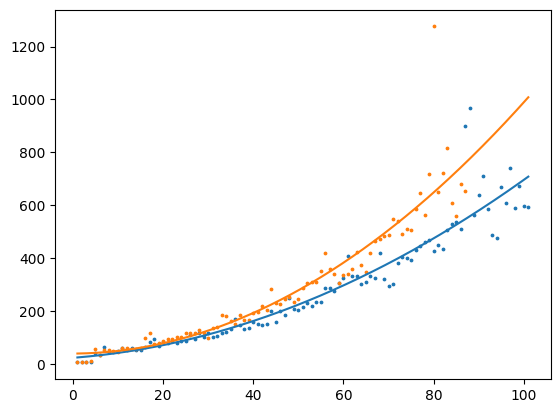

In [13]:
size1 = data_shaker['size']
time1 = data_shaker['time']

size2 = data_rascheska['size']
time2 = data_rascheska['time']

def mapping(x, a, b, c):
    return a * x ** 2 + b * x + c

popt1, _ = curve_fit(mapping, size1, time1)
popt2, _ = curve_fit(mapping, size2, time2)

a1, b1, c1 = popt1
a2, b2, c2 = popt2

x = np.linspace(min(*size1, *size2), max(*size1, *size2), 1000)

plt.scatter(size1, time1, s = 3)
plt.scatter(size2, time2, s = 3)

plt.plot(x, mapping(x, a1, b1, c1))
plt.plot(x, mapping(x, a2, b2, c2))

In [ ]:
size2 = data_rascheska['size']
perm2 = data_rascheska['time']

def mapping(x, a, b, c):
    return a * x ** 2 + b * x + c

popt2, _ = curve_fit(mapping, size2, perm2)
a2, b2, c2 = popt2

x = np.linspace(min(*size1, *size2), max(*size1, *size2), 1000)
plt.scatter(size2, perm2, s = 3)
plt.plot(x, mapping(x, a2, b2, c2))

In [14]:
with open('data_shell_geometry.csv') as file:
    data_geometry = pd.read_csv(file, delimiter=' ')
with open('data_shell_habbibi.csv') as file:
    data_habbibi = pd.read_csv(file, delimiter=' ')
with open('data_shell_fibonacchi.csv') as file:
    data_fibo = pd.read_csv(file, delimiter=' ')

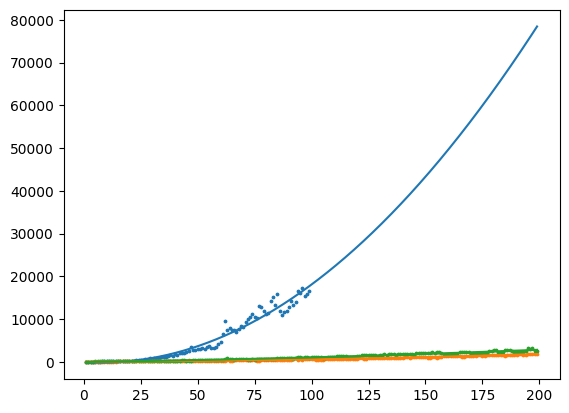

In [15]:
size_geom = data_geometry['size']
time_geom = data_geometry['time']

size_hab = data_habbibi['size']
time_hab = data_habbibi['time']

size_fibo = data_fibo['size']
time_fibo = data_fibo['time']

popt_geom, _ = curve_fit(mapping, size_geom, time_geom)
a_geom, b_geom, c_geom = popt_geom

popt_hab, _ = curve_fit(mapping, size_hab, time_hab)
a_hab, b_hab, c_hab = popt_hab

popt_fibo, _ = curve_fit(mapping, size_fibo, time_fibo)
a_fibo, b_fibo, c_fibo = popt_fibo

x = np.linspace(min(*size_geom, *size_hab, *size_fibo), max(*size_geom, *size_hab, *size_fibo), 1000)

plt.scatter(size_geom, time_geom, s = 3)
plt.plot(x, a_geom * x ** 2 + b_geom * x + c_geom)

plt.scatter(size_hab, time_hab, s = 3)
plt.plot(x, a_hab * x ** 2 + b_hab * x + c_hab)

plt.scatter(size_fibo, time_fibo, s = 3)
plt.plot(x, a_fibo * x ** 2 + b_fibo * x + c_fibo)